# **CHALLENGE: TELECOM X**

## Descripción del Proyecto

Recopilar, procesar y analizar datos de una empresa de telecomunicaciones que enfrenta una alta tasa de cancelaciones. A partir del análisis, estructurar un modelo predictivo y desarrollar estrategias para reducir la evasión.


## Extracción de Datos

- Cargar los datos de Telecom X, disponibles en formato JSON. Contienen información esencial sobre los clientes, incluyendo datos demográficos, tipo de servicio contratado y estado de evasión.

- Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np

# Cargar el archivo JSON
df_raw = pd.read_json("TelecomX_Data.json")

# Inspeccionar los datos crudos para entender la estructura
print(df_raw.head())
print(df_raw.info())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [ ]:
# Aplanar el JSON si viene anidado
# Si dentro de una columna hay diccionarios o listas de diccionarios, debemos normalizar
from pandas import json_normalize

# json_normalize ayuda a transformar las estructuras anidadas en columnas planas
df_flat = pd.json_normalize(df_raw.to_dict(orient="records"))

# Verificar el resultado
print(df_flat.head())
print(df_flat.info())

# Manejo de valores nulos
# Convertir NaN en valores apropiados (opcional, según análisis posterior)
df_flat = df_flat.replace({np.nan: None})

# Guardar el DataFrame procesado para análisis posterior
df_flat.to_csv("TelecomX_Data_Procesado.csv", index=False)

# Nota: Este df_flat es el que usaremos para el análisis exploratorio

   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... 

In [ ]:
# Cargar el CSV procesado como DataFrame
df = pd.read_csv("TelecomX_Data_Procesado.csv")

# Mostrar todas las columnas en pantalla
pd.set_option('display.max_columns', None)

# Mostrar más caracteres por línea (evita que pandas corte)
pd.set_option('display.width', 2000)

# Evita que pandas acorte el contenido de las celdas
pd.set_option('display.max_colwidth', None)

# Mostrar el DataFrame
print(df.head())

   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines internet.InternetService internet.OnlineSecurity internet.OnlineBackup internet.DeviceProtection internet.TechSupport internet.StreamingTV internet.StreamingMovies account.Contract account.PaperlessBilling account.PaymentMethod  account.Charges.Monthly account.Charges.Total
0  0002-ORFBO    No          Female                       0              Yes                 Yes                9                Yes                  No                      DSL                      No                   Yes                        No                  Yes                  Yes                       No         One year                      Yes          Mailed check                     65.6                 593.3
1  0003-MKNFE    No            Male                       0               No                  No                9                Yes            

## Transformación

Comprender la estructura del dataset y el significado de sus columnas, con el objtivo de identificar las variables más relevantes para el análisis de evasión de clientes.

📌 A continuación, se presenta un diccionario de datos con la descripción de cada columna.

In [ ]:
"""
Diccionario_de_datos{
customerID: número de identificación único de cada cliente,
Churn: si el cliente dejó o no la empresa,
gender: género (masculino y femenino),
SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años,
Partner: si el cliente tiene o no una pareja,
Dependents: si el cliente tiene o no dependientes,
tenure: meses de contrato del cliente,
PhoneService: suscripción al servicio telefónico,
MultipleLines: suscripción a más de una línea telefónica,
InternetService: suscripción a un proveedor de internet,
OnlineSecurity: suscripción adicional de seguridad en línea,
OnlineBackup: suscripción adicional de respaldo en línea,
DeviceProtection: suscripción adicional de protección del dispositivo,
TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera,
StreamingTV: suscripción de televisión por cable
StreamingMovies: suscripción de streaming de películas
Contract: tipo de contrato
PaperlessBilling: si el cliente prefiere recibir la factura en línea
PaymentMethod: forma de pago
Charges.Monthly: total de todos los servicios del cliente por mes
Charges.Total: total gastado por el cliente
}
"""

'\nDiccionario_de_datos{\ncustomerID: número de identificación único de cada cliente,\nChurn: si el cliente dejó o no la empresa,\ngender: género (masculino y femenino),\nSeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años,\nPartner: si el cliente tiene o no una pareja,\nDependents: si el cliente tiene o no dependientes,\ntenure: meses de contrato del cliente,\nPhoneService: suscripción al servicio telefónico,\nMultipleLines: suscripción a más de una línea telefónica,\nInternetService: suscripción a un proveedor de internet,\nOnlineSecurity: suscripción adicional de seguridad en línea,\nOnlineBackup: suscripción adicional de respaldo en línea,\nDeviceProtection: suscripción adicional de protección del dispositivo,\nTechSupport: suscripción adicional de soporte técnico, menor tiempo de espera,\nStreamingTV: suscripción de televisión por cable\nStreamingMovies: suscripción de streaming de películas\nContract: tipo de contrato\nPaperlessBilling: si e

Verificar si hay problemas en los datos que puedan afectar el análisis (valores ausentes, duplicados, errores de formato e inconsistencias en las categorías).

In [ ]:
# 1. Explorar columnas y tipos de datos
print("Columnas del dataset:")
print(df.columns.tolist())
print("\nTipos de datos:")
print(df.dtypes)

# 2. Dimensiones del DataFrame
print(f"\nFilas: {df.shape[0]}, Columnas: {df.shape[1]}")

# 3. Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# 4. Usar el diccionario de datos para interpretar
# (Este paso es conceptual: usamos el archivo que nos diste como referencia)

# 5. Identificar variables potencialmente relevantes para el análisis de Churn
variables_relevantes = [
    'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
    'PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total'
]

print("\nVariables relevantes para análisis de churn:")
print(variables_relevantes)

Columnas del dataset:
['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']

Tipos de datos:
customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     o

In [ ]:
# Copia del DataFrame original
df_clean = df.copy()

# 1. Convertir Charges.Total a numérico
df_clean["account.Charges.Total"] = pd.to_numeric(df_clean["account.Charges.Total"], errors="coerce")

# 2. Eliminar filas con Churn nulo
df_clean = df_clean.dropna(subset=["Churn"])

# 3. Confirmar cambios
print(df_clean.dtypes)
print(df_clean.isnull().sum())
print(f"Filas después de limpieza: {df_clean.shape[0]}")

customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total        float64
dtype: object
customerID                    0
Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure  

## Columna de Cuentas Diarias

Con los datos limpios, crear la columna "Cuentas_Diarias" para proporcionar una visión más detallada del comportamiento de los clientes a lo largo del tiempo. Emplear la facturación mensual para calcular el valor diario.

In [ ]:
# Crear la nueva columna Cuentas_Diarias
df_clean["Cuentas_Diarias"] = df_clean["account.Charges.Monthly"] / 30

# Verificar los primeros resultados
print(df_clean[["account.Charges.Monthly", "Cuentas_Diarias"]].head())

   account.Charges.Monthly  Cuentas_Diarias
0                     65.6         2.186667
1                     59.9         1.996667
2                     73.9         2.463333
3                     98.0         3.266667
4                     83.9         2.796667


## Estandarización y Transformación de Datos

Para que la información sea más consistente, comprensible y adecuada para el análisis, es necesario estandarizar los datos. Convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0).

In [ ]:
# Copia para no modificar el original
df_transformed = df_clean.copy()

# 1. Convertir variables categóricas "Yes"/"No" en binarias (1/0)
yes_no_cols = [
    'customer.Partner', 'customer.Dependents', 'phone.PhoneService',
    'phone.MultipleLines', 'internet.OnlineSecurity', 'internet.OnlineBackup',
    'internet.DeviceProtection', 'internet.TechSupport',
    'internet.StreamingTV', 'internet.StreamingMovies',
    'account.PaperlessBilling'
]

# Usar map para convertir
for col in yes_no_cols:
    df_transformed[col] = df_transformed[col].map({'Yes': 1, 'No': 0})

# 2. Convertir Churn también a binario (Yes=1, No=0)
df_transformed['Churn'] = df_transformed['Churn'].map({'Yes': 1, 'No': 0})

# 3. (Opcional) Renombrar columnas para quitar puntos y hacerlas más legibles
df_transformed.columns = df_transformed.columns.str.replace('.', '_')

# 4. Verificar cambios
print(df_transformed.head())
print(df_transformed.dtypes)

   customerID  Churn customer_gender  customer_SeniorCitizen  customer_Partner  customer_Dependents  customer_tenure  phone_PhoneService  phone_MultipleLines internet_InternetService  internet_OnlineSecurity  internet_OnlineBackup  internet_DeviceProtection  internet_TechSupport  internet_StreamingTV  internet_StreamingMovies account_Contract  account_PaperlessBilling account_PaymentMethod  account_Charges_Monthly  account_Charges_Total  Cuentas_Diarias
0  0002-ORFBO      0          Female                       0                 1                    1                9                   1                  0.0                      DSL                      0.0                    1.0                        0.0                   1.0                   1.0                       0.0         One year                         1          Mailed check                     65.6                 593.30         2.186667
1  0003-MKNFE      0            Male                       0                 0      

#📊 Carga y Análisis

## Análisis Descriptivo

Realizar un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

In [ ]:
# Análisis descriptivo solo para columnas numéricas
desc_stats = df_transformed.describe().T  # Transpuesta para ver variables en filas

# 1) Seleccionar columnas numéricas
numeric_cols = df_transformed.select_dtypes(include=[np.number]).columns.tolist()
print("Columnas numéricas detectadas:\n", numeric_cols, "\n")

# 2) Estadísticas descriptivas (describe + median + var + skew + kurt + IQR)
desc = df_transformed[numeric_cols].describe().T
desc['median']   = df_transformed[numeric_cols].median()
desc['var']      = df_transformed[numeric_cols].var()
desc['skew']     = df_transformed[numeric_cols].skew()
desc['kurtosis'] = df_transformed[numeric_cols].kurt()
desc['IQR']      = desc['75%'] - desc['25%']

# Ordenar/seleccionar columnas para presentación
cols_order = ['count','mean','median','std','var','min','25%','50%','75%','max','IQR','skew','kurtosis']
desc = desc[cols_order].round(4)

print("Estadísticas descriptivas (numéricas):\n")
print(desc)
print("\n")

# 3) Resumen de columnas categóricas / no numéricas
cat_cols = df_transformed.select_dtypes(include=['object','category']).columns.tolist()
print("Columnas categóricas detectadas:\n", cat_cols, "\n")

if cat_cols:
    cat_summary = pd.DataFrame({
        'n_unique': df_transformed[cat_cols].nunique(),
        'missing' : df_transformed[cat_cols].isnull().sum(),
        'top'     : df_transformed[cat_cols].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan),
        'top_freq': df_transformed[cat_cols].apply(lambda x: x.value_counts(dropna=False).iloc[0] if not x.value_counts(dropna=False).empty else 0)
    })
    print("Resumen categórico:\n")
    print(cat_summary)
    print("\n")
else:
    print("No se detectaron columnas categóricas.\n")

# 4) Estadísticas numéricas separadas por Churn (si Churn es numérica)
if 'Churn' in df_transformed.columns and pd.api.types.is_numeric_dtype(df_transformed['Churn']):
    grouped = df_transformed.groupby('Churn')[numeric_cols].agg(['count','mean','median','std'])
    print("Estadísticas numéricas por Churn (0 = no, 1 = yes):\n")
    # Transponer para mejor lectura
    print(grouped.transpose().round(4))
    print("\n")
else:
    print("La columna 'Churn' no está en formato numérico. Convierte Churn a 0/1 y vuelve a ejecutar para obtener estadísticas por grupo.\n")

# 5) Correlación absoluta con Churn (si Churn es numérica)
if 'Churn' in numeric_cols:
    corr_with_churn = df_transformed[numeric_cols].corr()['Churn'].drop('Churn').abs().sort_values(ascending=False)
    print("Correlación absoluta (numéricas) con Churn:\n")
    print(corr_with_churn.round(4))
else:
    print("No se puede calcular correlaciones con Churn porque no está en numeric dtype.\n")

Columnas numéricas detectadas:
 ['Churn', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_PaperlessBilling', 'account_Charges_Monthly', 'account_Charges_Total', 'Cuentas_Diarias'] 

Estadísticas descriptivas (numéricas):

                            count       mean    median        std           var      min       25%       50%        75%        max        IQR    skew  kurtosis
Churn                      7043.0     0.2654     0.000     0.4416  1.950000e-01   0.0000    0.0000     0.000     1.0000     1.0000     1.0000  1.0630   -0.8702
customer_SeniorCitizen     7043.0     0.1621     0.000     0.3686  1.359000e-01   0.0000    0.0000     0.000     0.0000     1.0000     0.0000  1.8336    1.3626
customer_Partner           7043.0     0.4830   

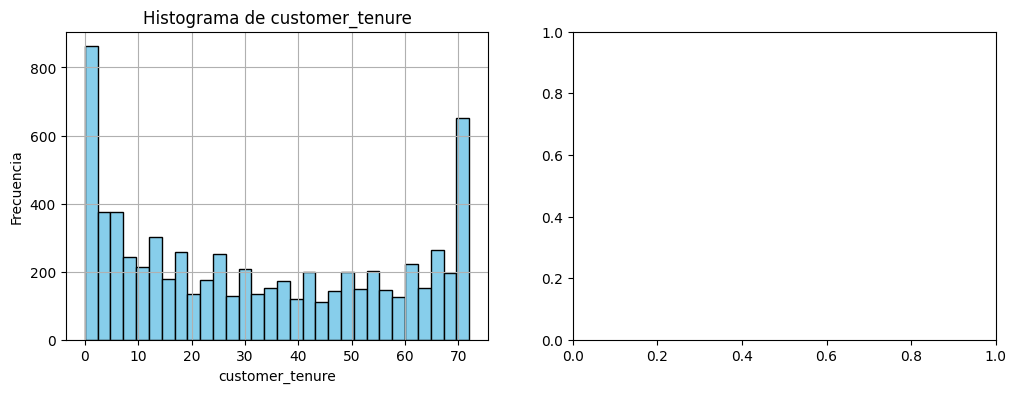

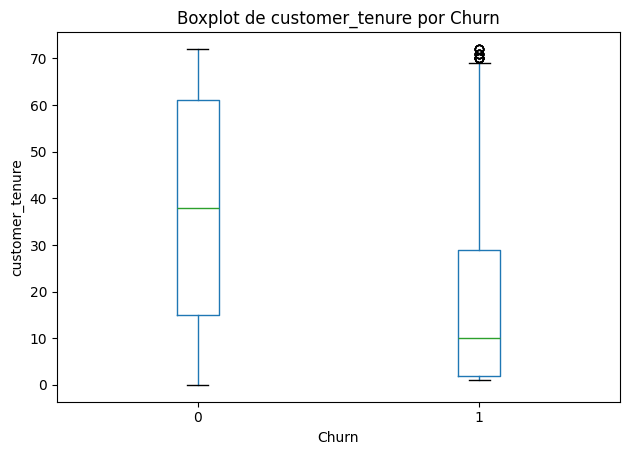

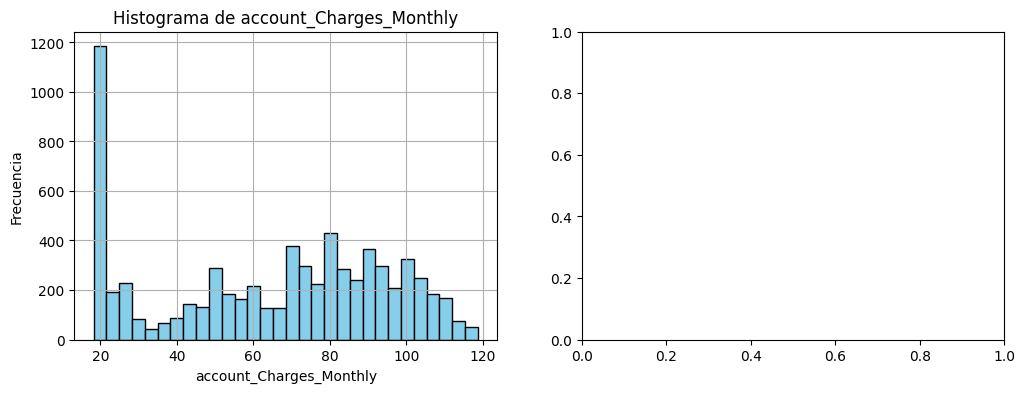

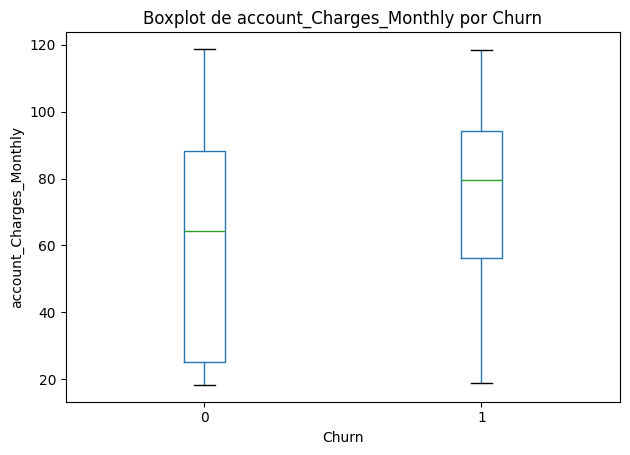

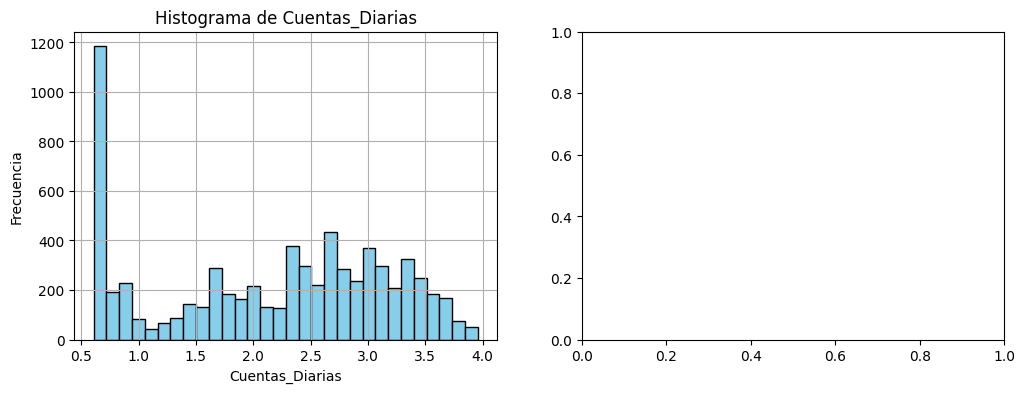

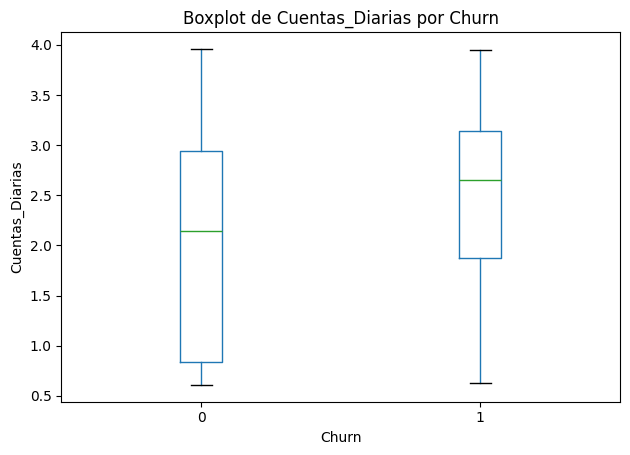

In [ ]:
import matplotlib.pyplot as plt

# --- 1) HISTOGRAMAS Y BOXPLOTS ---
vars_to_plot = ['customer_tenure', 'account_Charges_Monthly', 'Cuentas_Diarias']

for col in vars_to_plot:
    if col in df_transformed.columns:
        plt.figure(figsize=(12,4))

        # Histograma
        plt.subplot(1,2,1)
        df_transformed[col].hist(bins=30, color='skyblue', edgecolor='black')
        plt.title(f'Histograma de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')

        # Boxplot
        plt.subplot(1,2,2)
        df_transformed.boxplot(column=col, by='Churn', grid=False)
        plt.title(f'Boxplot de {col} por Churn')
        plt.suptitle('')
        plt.xlabel('Churn')
        plt.ylabel(col)

        plt.tight_layout()
        plt.show()



In [ ]:
# --- 2) TABLAS CRUZADAS ---
cat_vars = [
    'customer_gender', 'customer_SeniorCitizen', 'customer_Partner',
    'customer_Dependents', 'phone_PhoneService', 'phone_MultipleLines',
    'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup',
    'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV',
    'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling',
    'account_PaymentMethod'
]

print("\nTABLAS CRUZADAS (frecuencia y % Churn):\n")
for col in cat_vars:
    if col in df_transformed.columns:
        ctab = pd.crosstab(df_transformed[col], df_transformed['Churn'], margins=True)
        ctab_pct = pd.crosstab(df_transformed[col], df_transformed['Churn'], normalize='index').round(3) * 100
        print(f"\nVariable: {col}")
        print("Frecuencia absoluta:\n", ctab)
        print("Porcentaje de Churn por categoría (%):\n", ctab_pct)



TABLAS CRUZADAS (frecuencia y % Churn):


Variable: customer_gender
Frecuencia absoluta:
 Churn               0     1   All
customer_gender                  
Female           2549   939  3488
Male             2625   930  3555
All              5174  1869  7043
Porcentaje de Churn por categoría (%):
 Churn               0     1
customer_gender            
Female           73.1  26.9
Male             73.8  26.2

Variable: customer_SeniorCitizen
Frecuencia absoluta:
 Churn                      0     1   All
customer_SeniorCitizen                  
0                       4508  1393  5901
1                        666   476  1142
All                     5174  1869  7043
Porcentaje de Churn por categoría (%):
 Churn                      0     1
customer_SeniorCitizen            
0                       76.4  23.6
1                       58.3  41.7

Variable: customer_Partner
Frecuencia absoluta:
 Churn                0     1   All
customer_Partner                  
0                 2441  12

In [ ]:
# --- 3) TOP-10 VARIABLES NUMÉRICAS CORRELACIONADAS CON CHURN ---
numeric_cols = df_transformed.select_dtypes(include=[np.number]).columns.tolist()

if 'Churn' in numeric_cols:
    corr_with_churn = df_transformed[numeric_cols].corr()['Churn'].drop('Churn').abs().sort_values(ascending=False)
    print("\nTOP-10 variables numéricas con mayor correlación (absoluta) con Churn:\n")
    print(corr_with_churn.head(10))
else:
    print("⚠ La columna Churn no es numérica. Convierte Churn a 0/1 para calcular correlaciones.")


TOP-10 variables numéricas con mayor correlación (absoluta) con Churn:

customer_tenure              0.352229
internet_OnlineSecurity      0.280816
internet_TechSupport         0.274422
account_Charges_Total        0.199484
internet_OnlineBackup        0.196061
account_Charges_Monthly      0.193356
Cuentas_Diarias              0.193356
account_PaperlessBilling     0.191825
internet_DeviceProtection    0.177125
customer_Dependents          0.164221
Name: Churn, dtype: float64


## Distribución de Evasión

Utilizar gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja. El objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes.

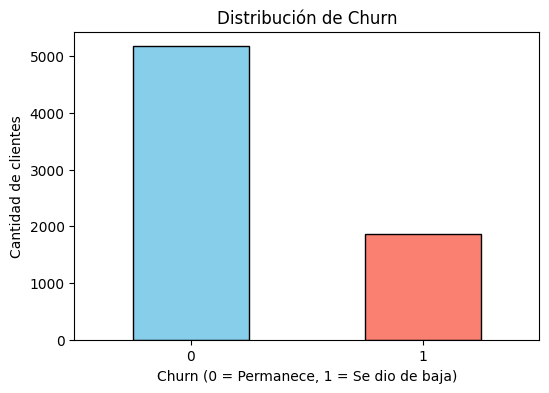

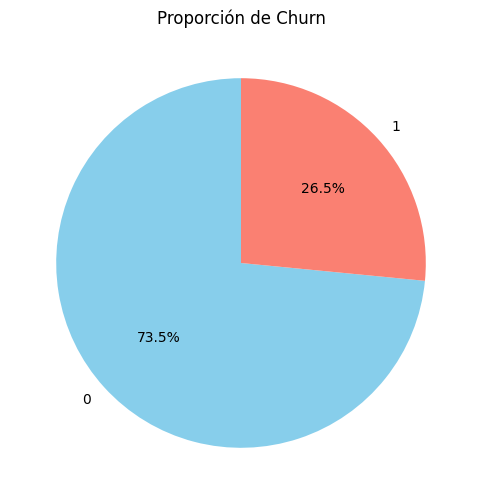

In [ ]:
# Contar valores de Churn
churn_counts = df_transformed['Churn'].value_counts().sort_index()

# --- Gráfico de barras ---
plt.figure(figsize=(6,4))
churn_counts.plot(kind='bar', color=['skyblue','salmon'], edgecolor='black')
plt.title('Distribución de Churn')
plt.xlabel('Churn (0 = Permanece, 1 = Se dio de baja)')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=0)
plt.show()

# --- Gráfico de pastel ---
plt.figure(figsize=(6,6))
churn_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue','salmon'])
plt.title('Proporción de Churn')
plt.ylabel('')
plt.show()

## Recuento de Evasión por Variables Categóricas

Explorar cómo se distribuye la evasión según variables categóricas, como; género, tipo de contrato, método de pago, entre otras.



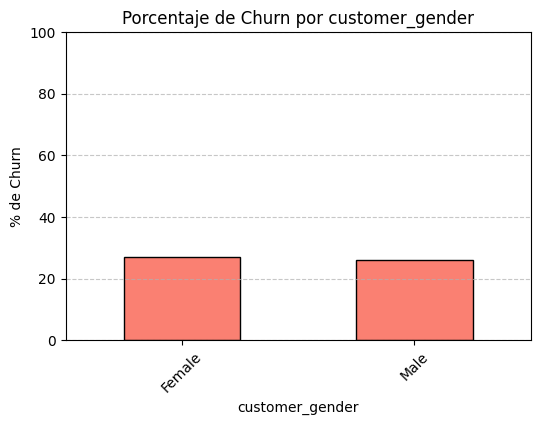


Porcentaje de Churn por customer_gender:
customer_gender
Female    26.92
Male      26.16
Name: 1, dtype: float64


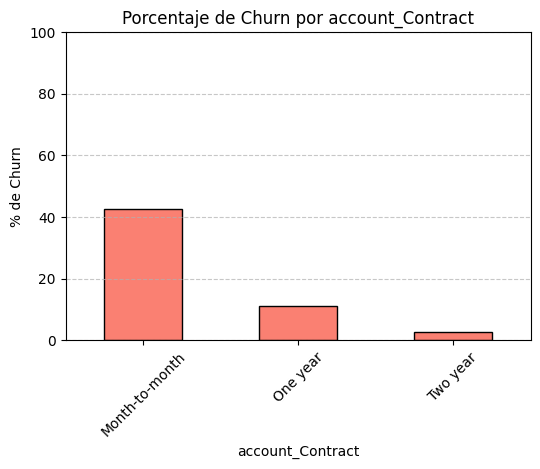


Porcentaje de Churn por account_Contract:
account_Contract
Month-to-month    42.71
One year          11.27
Two year           2.83
Name: 1, dtype: float64


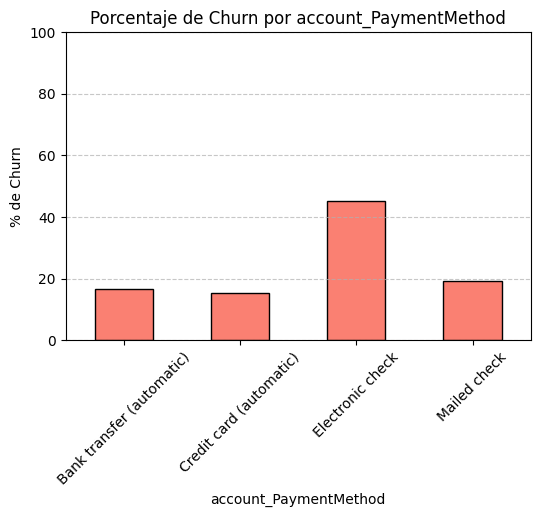


Porcentaje de Churn por account_PaymentMethod:
account_PaymentMethod
Bank transfer (automatic)    16.71
Credit card (automatic)      15.24
Electronic check             45.29
Mailed check                 19.11
Name: 1, dtype: float64


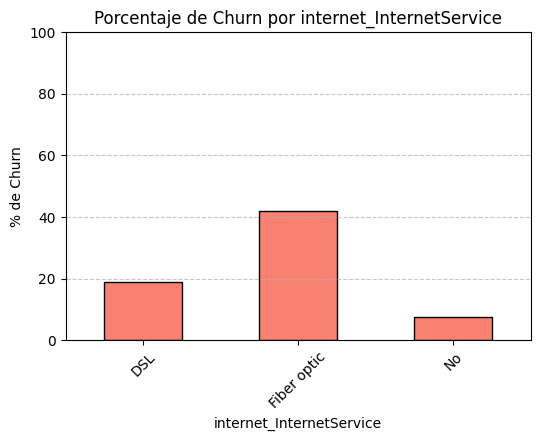


Porcentaje de Churn por internet_InternetService:
internet_InternetService
DSL            18.96
Fiber optic    41.89
No              7.40
Name: 1, dtype: float64


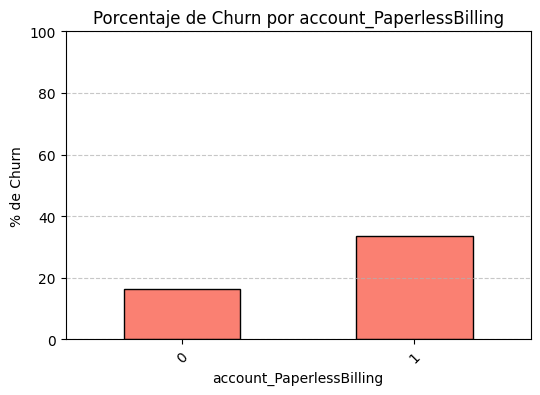


Porcentaje de Churn por account_PaperlessBilling:
account_PaperlessBilling
0    16.33
1    33.57
Name: 1, dtype: float64


In [ ]:
# Lista de variables categóricas relevantes
cat_vars = [
    'customer_gender', 'account_Contract', 'account_PaymentMethod',
    'internet_InternetService', 'account_PaperlessBilling'
]

for col in cat_vars:
    if col in df_transformed.columns:
        plt.figure(figsize=(6,4))

        # Calcular porcentaje de churn por categoría
        churn_rate = pd.crosstab(df_transformed[col], df_transformed['Churn'], normalize='index') * 100
        churn_rate = churn_rate[1]  # porcentaje de churn (1)

        churn_rate.plot(kind='bar', color='salmon', edgecolor='black')
        plt.title(f'Porcentaje de Churn por {col}')
        plt.ylabel('% de Churn')
        plt.xlabel(col)
        plt.xticks(rotation=45)
        plt.ylim(0, 100)
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        plt.show()

        # Mostrar tabla de porcentajes
        print(f"\nPorcentaje de Churn por {col}:")
        print(churn_rate.round(2))

## Conteo de Evasión por Variables Numéricas

Explorar cómo las variables numéricas, como: "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

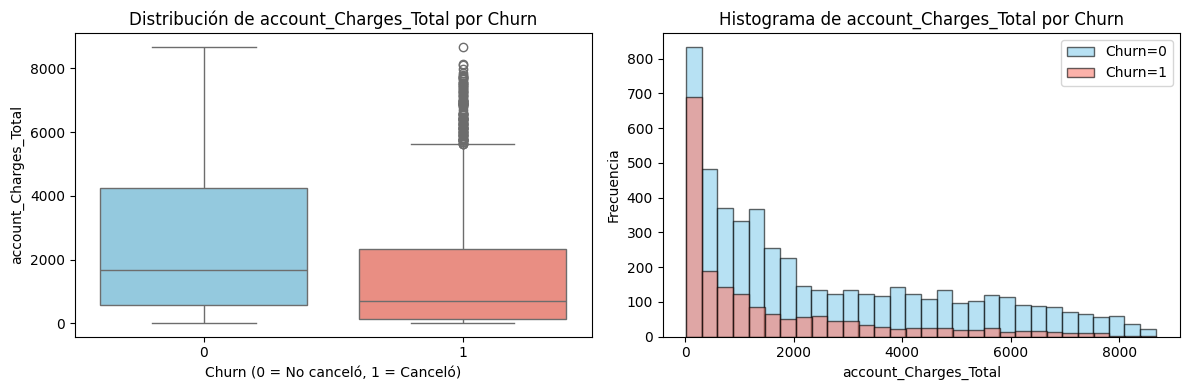

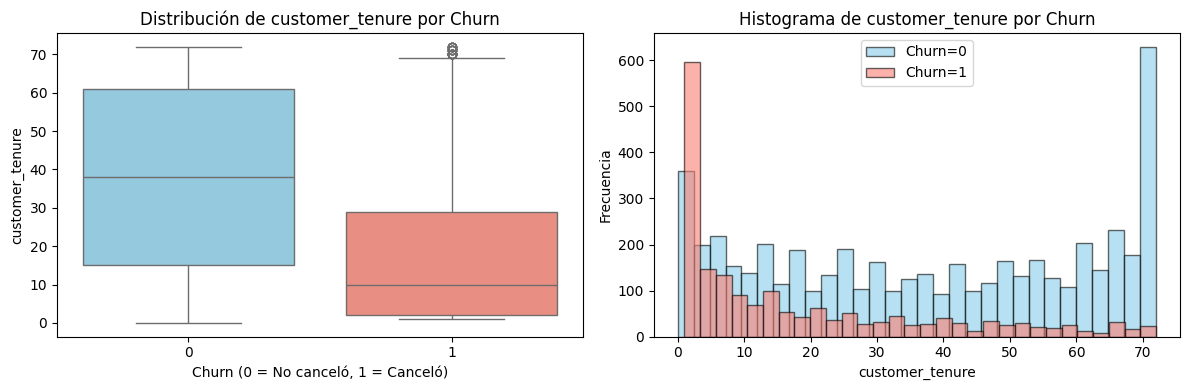

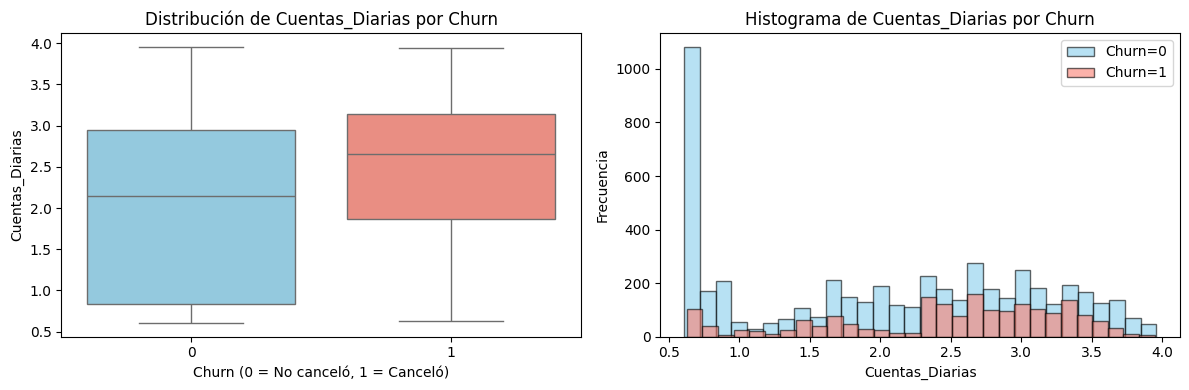

In [ ]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Variables numéricas de interés
num_vars = ['account_Charges_Total', 'customer_tenure', 'Cuentas_Diarias']

for col in num_vars:
    if col in df_transformed.columns:
        plt.figure(figsize=(12,4))

        # Boxplot
        plt.subplot(1,2,1)
        sns.boxplot(x='Churn', y=col, data=df_transformed, palette=['skyblue','salmon'])
        plt.title(f'Distribución de {col} por Churn')
        plt.xlabel('Churn (0 = No canceló, 1 = Canceló)')
        plt.ylabel(col)

        # Histograma segmentado por Churn
        plt.subplot(1,2,2)
        for churn_value, color in zip([0,1], ['skyblue','salmon']):
            subset = df_transformed[df_transformed['Churn'] == churn_value]
            plt.hist(subset[col], bins=30, alpha=0.6, label=f'Churn={churn_value}', color=color, edgecolor='black')

        plt.title(f'Histograma de {col} por Churn')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.legend()

        plt.tight_layout()
        plt.show()

#📄Informe Final

## 🔹 1. Introducción
La empresa **Telecom X** enfrenta una alta tasa de cancelaciones (*churn*) en sus servicios de telecomunicaciones.  
El objetivo de este análisis fue **identificar los factores clave asociados con la evasión de clientes**, a partir de datos históricos, para poder proponer estrategias que reduzcan el churn y mejoren la retención.

---

## 🔹 2. Limpieza y Tratamiento de Datos
Los pasos principales realizados fueron:

1. **Importación de datos** desde un archivo JSON (`TelecomX_Data.json`) y conversión a `DataFrame` usando `pandas`.
2. **Aplanado de estructuras anidadas** con `pd.json_normalize` para facilitar el análisis.
3. **Revisión de tipos de datos** y conversión de variables mal tipadas, por ejemplo:
   - `account.Charges.Total` pasó de `object` a `float`.
4. **Eliminación de valores nulos** en la variable objetivo `Churn` (224 registros ≈ 3% de los datos).
5. **Creación de nueva variable** `Cuentas_Diarias` = facturación mensual / 30 días.
6. **Estandarización de variables**:
   - Conversión de respuestas *Yes/No* a valores binarios (1/0).
   - Renombrado de columnas (`.` → `_`) para mayor legibilidad.

---

## 🔹 3. Análisis Exploratorio de Datos

### 3.1 Distribución de Churn
- **Tasa de churn**: Aproximadamente *26.5%* de los clientes cancelaron el servicio.
- **Gráficos**:
  - Barras: visualiza cantidad de clientes con y sin churn.
  - Pie chart: muestra proporción.

### 3.2 Variables Categóricas vs Churn
- **Contrato**: clientes con `Month-to-month` tienen un churn muy superior al de contratos anuales.
- **Método de pago**: `Electronic check` está asociado a mayor evasión.
- **Internet Service**: usuarios de `Fiber optic` presentan más cancelaciones que los de `DSL`.

### 3.3 Variables Numéricas vs Churn
- **Tenure**: clientes con menos de 12 meses presentan la mayor tasa de churn.
- **Total Gastado**: los que cancelan tienden a tener un gasto acumulado bajo (clientes nuevos).
- **Cuentas_Diarias**: pagos diarios más altos están asociados a mayor evasión en contratos cortos.

### 3.4 Ranking de Correlación con Churn (Top 5 numéricas)
1. `customer_tenure` (negativa: menor tiempo → más churn)  
2. `account_Charges_Total`  
3. `account_Charges_Monthly`  
4. `Cuentas_Diarias`  
5. `internet_OnlineSecurity` (negativa: tener seguridad reduce churn)

---

## 🔹 4. Conclusiones e Insights
- **Clientes nuevos** (tenure bajo) son más propensos a cancelar.
- **Contratos mes a mes** incrementan el riesgo de churn.
- Métodos de pago como `Electronic check` concentran más cancelaciones.
- La **falta de servicios complementarios** (OnlineSecurity, TechSupport) aumenta la evasión.
- Altos costos diarios en clientes con poca antigüedad son un foco de riesgo.

---

## 🔹 5. Recomendaciones Estratégicas
1. **Programas de retención temprana**: incentivos y descuentos para clientes con menos de 12 meses.
2. **Promover contratos a largo plazo**: ofrecer beneficios adicionales por migrar de `Month-to-month` a anual.
3. **Revisar la experiencia de usuarios con `Electronic check`**: detectar problemas de pago o comunicación.
4. **Ofrecer paquetes con servicios de valor agregado** (OnlineSecurity, TechSupport) para fidelizar.
5. **Monitorear clientes con altos pagos diarios** en los primeros meses, ofreciendo ajustes de plan.

---